In [0]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('mnist/', one_hot = False)

W0730 07:50:14.842251 139658372028288 deprecation.py:323] From <ipython-input-1-8a2d40bc1ba6>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0730 07:50:14.844196 139658372028288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0730 07:50:14.845693 139658372028288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist/train-images-idx3-ubyte.gz


W0730 07:50:15.253129 139658372028288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0730 07:50:15.342140 139658372028288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [0]:
x_treinamento = mnist.train.images
y_treinamento = mnist.train.labels

x_teste = mnist.test.images
y_teste = mnist.test.labels

In [0]:
#converte para array de inteiro 32 bit, necessário para passar como "labels" no tensorflow
y_treinamento = np.asarray(y_treinamento, dtype = np.int32)
y_teste = np.asarray(y_teste, dtype = np.int32)

In [0]:
x_treinamento.shape

(55000, 784)

In [0]:
x_teste.shape

(10000, 784)

In [0]:
x_treinamento

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
y_treinamento

array([7, 3, 4, ..., 5, 6, 8], dtype=int32)

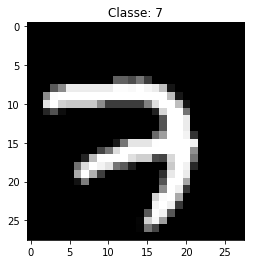

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
#exibe em formato de imagem um dos itens, da o reshape porque o item esta em formato de vetor, e nao em matriz de 28X28, que e o formato original da imagem
plt.title('Classe: ' + str(y_treinamento[0]))
plt.imshow(x_treinamento[0].reshape([28,28]), cmap='gray')

In [0]:
import tensorflow as tf

In [0]:
# sera criado um estimator personalizado para a CNN
# para criar o estimator, precisamos de uma function, que tenha os parametros ja pre definidos conforme documentacao do tensorflow
# o nome dos parametros PRECISA ser identico ao especificado na documentacao
# features = dados de entrada que serão previstos
# labels = resultado já determinado, usado para o treinamento
# mode = indica qual modo está o estimator no momento, esse parametro é implicito, passado automaticamente pelo tensorflow
#   e ainda pode ter tres valores, TRAIN para treinamento, EVAL para testes e PREDICT para prever (produção)
def cria_rede(features, labels, mode):
  # coloca a features no formato do tf, com alias 'x', e com os demais parametros
  # batch_size, altura, largura, canais
  # batch_size fica -1, porque sera definido mais tarde
  # canais so vai ter 1 porque esta em escala de cinza, se fosse colorido seriam 3(RGB)
  entrada = tf.reshape(features['x'], [-1, 28, 28, 1])
  
  # vai ser criado duas camadas de convolução
  # conv2d e uma camada já especifica para CNN
  # inputs = entrada dos dados
  # filters = quantidade de detector de caracteristicas
  # kernel_size = tamanho dos detectores de caracteristicas (5x5 e um tamanho recomendado na documentacao do tensorflow)
  # activation = função de ativação da saida do detector de caracteristicas
  # padding = muda a altura e largura das imagens (same preserva o tamanho original)
  # recebe [batch_size, 28, 28, 1]
  #retorna [batch_size, 28, 28, 32], aonde 32 serão os filtros criados, e nao os canais de cores como recebe
  convolucao1 = tf.layers.conv2d(inputs = entrada, filters = 32, kernel_size = [5,5], activation = tf.nn.relu, padding = 'same')
  
  # camada de pooling
  # inputs = recebe os dados do detector de caracteristicas
  # pool_size = tamanho da area de matriz que será feito o max
  # strides = indica quanto registros o pool_size deve se mover para formar um novo pool_size, ou quanto deve "andar" o pool_size
  # vai retornar uma matriz 14x14
  # recebe [bach_size, 28, 28, 32]
  # retorna [bach_size, 14, 14, 32]
  pooling1 = tf.layers.max_pooling2d(inputs = convolucao1, pool_size = [2,2], strides = 2)
  
  #segunda camanda de convolucao, baseada no resultado da primeira
  # recebe [bach_size, 14, 14, 32]
  # retorna [bach_size, 14, 14, 64]  
  convolucao2 = tf.layers.conv2d(inputs = pooling1, filters = 64, kernel_size = [5,5], activation = tf.nn.relu, padding = 'same')
  
  # recebe [bach_size, 14, 14, 64]
  # retorna [bach_size, 7, 7, 64]    
  pooling2 = tf.layers.max_pooling2d(inputs = convolucao2, pool_size = [2,2], strides = 2)
  
  # recebe [batch_size, 7, 7, 64]
  # retornar [batch_size, 3136]
  # transforma as matrizes em vetores
  # o tamanho do vetor é 7 * 7 por causa das dimensoes da matriz, e o 8 64 é pro causa dos mapas gerados
  # assim os varios mapas vão entrar na rede neural
  flattening = tf.reshape(pooling2, [-1, 7 * 7 * 64])
  
  # somente uma cada oculta
  # 3136 (entradas) -> 1024 (oculta) -> 10 (saida)
  # recebe [batch_size, 3136]
  # retorna [batch_size, 1024]
  densa = tf.layers.dense(inputs = flattening, units = 1024, activation = tf.nn.relu)
  
  # dropout
  # visa zerar as entradas de alguns neuronios, conforme especificado
  # é bom para evitar o processamento muito alto (neste exemplo, a densa receberia 3136 atributos e teria 1024 na camada oculta, 
  #    gerando um numero muito alto de pesos = 3136 * 1024)
  # é bom para evitar o overfiting
  # inputs = o que deseja zerar
  # rate = o percentual que deseja zerar
  # Cuidar para nao zerar muitos registros
  # Também so deve ser executado no treinamento, quando for fazer a previsao ou validacao(testes), nao deve realizar o dropout
  dropout = tf.layers.dropout(inputs = densa, rate = 0.2, training = mode == tf.estimator.ModeKeys.TRAIN)
  
  # vai fazer a ligação entre a camada oculta e a camada de saida
  # recebe [batch_size, 1024]
  # retorna [batch_size, 10]
  saida = tf.layers.dense(inputs = dropout, units = 10)
  
  # define o valor da previsao.
  #usando argmax, para saber a posiçao do vetor de saida de maior valor, indicando que é a maior probabilidade
  previsoes = tf.argmax(saida, axis = 1)
  
  
  # ETAPAS PERTINENTES A PREVISAO (tem que ficar aqui, antes do erro = pois senão da erro)
  if mode == tf.estimator.ModeKeys.PREDICT:
    # retornar o estimator passando o que deve ser previsto
    # mode = mode, etapa que esta atualmente, vai ser executado somente durante a previsao
    # predictions = previsoes, recebe as previsões já realizada pela rede
    return tf.estimator.EstimatorSpec(mode = mode, predictions = previsoes)
  

  # Cria o calculo de erro
  # aqui é usado o sparse_softmax_cross_entropy, porque os dados de classe não foram tratados no one hot encoder
  # ou seja, não estão em formato 1 = [0,0,0,0,0,0,0,0,1], e sim [1]
  # quando se tem muitas classes, usar o sparse_softmax_cross_entropy pode acelerar o processo de treino
  # labels = sao as classes ja conhecidas
  # logits = e a saida da rede (previsao)
  erro = tf.losses.sparse_softmax_cross_entropy(labels = labels, logits = saida)
  
  # ETAPAS PERTINENTES AO TREINAMENTO APENAS
  if mode == tf.estimator.ModeKeys.TRAIN:
    # cria o otimizador
    # learning_rate = recebe a taxa de aprendizado que a rede vai possuir
    otimizador = tf.train.AdamOptimizer(learning_rate = 0.001)

    #faz o treinamento
    # global_step = tf.train.get_global_step() é uma flag para que o tensoflow salve e utilize os valores anteriores, para conseguir treinar. Assim ele sabe em que step ele esta
    treinamento = otimizador.minimize(erro, global_step = tf.train.get_global_step())
  
    #retorna a estrutura no formato de um estimator no tensorflow
    return tf.estimator.EstimatorSpec(mode = mode, loss = erro, train_op = treinamento)
  
  # ETAPAS PERTINENTES A PARTE DE AVALIAÇÃO(testes)
  if mode == tf.estimator.ModeKeys.EVAL:
    # Cria um registro de dicionario que vai conter os dados de precisao do teste feito
    # labels = labels, recebe o valor que deveria ser
    # predictions = previsoes, recebe o valor que foi previsto
    eval_metrics_ops = {'accuracy': tf.metrics.accuracy(labels = labels, predictions = previsoes)}
    
    # retorna a estrutura pertinente aos testes, apontado a precisão e erro
    # mode = mode, recebe o mode passado implicitamente pelo tensorflow, que vai indicar a classe o modo atual (teste)
    # loss = erro, recebe a formula de erro
    # val_metric_ops = eval_metrics_ops, manda a estrutura de validação para ser agregada a estrutura final
    return tf.estimator.EstimatorSpec(mode = mode, loss = erro, eval_metric_ops = eval_metrics_ops)
 


In [0]:
#cria o estimator
classificador = tf.estimator.Estimator(model_fn = cria_rede)

W0730 07:50:16.069924 139658372028288 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpgdxd22o2


In [0]:
# cria a funcao de treinamento
# o x recebe um dicionario contendo o nome criado no cria_rede (features), para linkar o x_treinamento
# o y recebe direto o y_treinamento
# num_epochs é None porque ele sera definido mais adiante
# shuffle para enbaralhar o conteudo passado em x e y
funcao_treinamento = tf.estimator.inputs.numpy_input_fn(x = {'x' : x_treinamento},
                                                       y = y_treinamento,
                                                       batch_size = 128,
                                                       num_epochs = None,
                                                       shuffle = True)

#realiza o treinamento
classificador.train(input_fn = funcao_treinamento, steps = 200)

W0730 07:50:16.096970 139658372028288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0730 07:50:16.118667 139658372028288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0730 07:50:16.122701 139658372028288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_functions.py:500: add_

In [0]:
#função para testar
funcao_teste = tf.estimator.inputs.numpy_input_fn(x = {'x' : x_teste}, y= y_teste, num_epochs = 1, shuffle = False)
resultado = classificador.evaluate(input_fn = funcao_teste)
print(resultado)

W0730 07:50:27.642342 139658372028288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


{'accuracy': 0.9772, 'loss': 0.07271737, 'global_step': 200}


In [0]:
# realizando uma previsão, usando uma imagem da propria base
x_imagem_teste = x_teste[0]
# o shape da imagem está como (784,), como um vetor, mas para testar precisa adicionar uma coluna a frente, para ficar no formato de matriz, por isso o reshape
x_imagem_teste = x_imagem_teste.reshape(1,-1)
x_imagem_teste.shape

(1, 784)

In [0]:
x_imagem_teste

In [0]:
#cria a função para previsão, propriamente dito
#shuffle não tem efeito aqui pq tem 1 registro so
funcao_previsao = tf.estimator.inputs.numpy_input_fn(x = {'x':x_imagem_teste}, shuffle = False)
#gera a previsão
pred = list(classificador.predict(input_fn = funcao_previsao))

print(pred)

[7]


Text(0.5, 1.0, 'Classe prevista: 7')

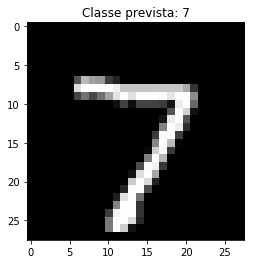

In [0]:
# verifica a previsao
plt.imshow(x_imagem_teste.reshape((28,28)), cmap = 'gray')
plt.title("Classe prevista: " + str(pred[0]))